In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

%matplotlib inline

In [2]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

### Load monthly files from the 202111

In [3]:
f=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140101_20140131.nc')

In [4]:
f1=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140201_20140228.nc')

In [5]:
f2=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140301_20140331.nc')

In [6]:
f3=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140401_20140430.nc')

In [7]:
f4=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140501_20140531.nc')

In [8]:
f5=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140601_20140630.nc')

In [9]:
f6=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140701_20140731.nc')

In [10]:
f7=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140801_20140831.nc')

In [11]:
f8=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20140901_20140930.nc')

In [12]:
f9=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20141001_20141031.nc')

In [13]:
f10=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20141101_20141130.nc')

In [14]:
f11=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20141201_20141231.nc')

In [15]:
f1.variables.keys()

dict_keys(['sossheig', 'votemper', 'vosaline', 'sigma_theta', 'e3t', 'gridY', 'gridX', 'depth', 'time'])

In [16]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Depth Profile

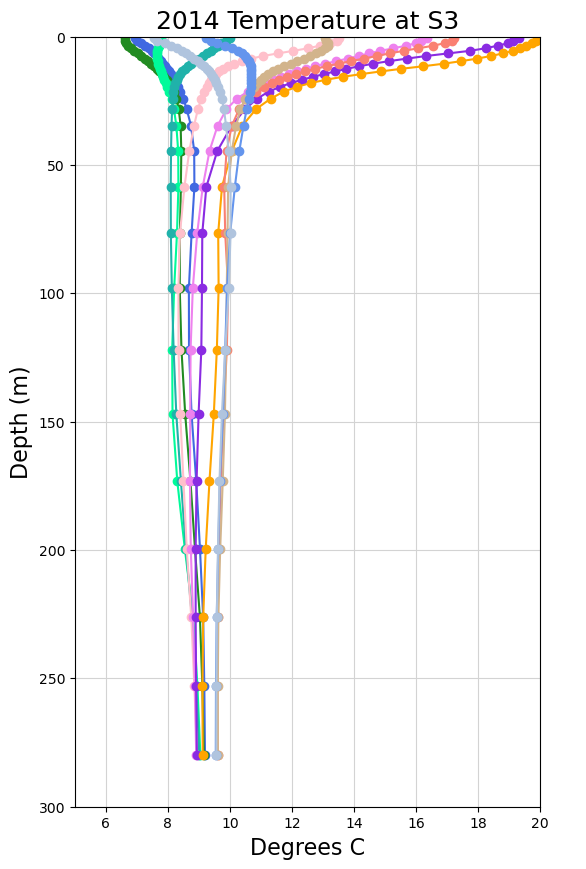

In [17]:
fig,ax=plt.subplots(1,1,figsize=(6,10))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
fig.subplots_adjust(wspace=.5) # space the axes out more
il=0 # use 0 because this is a monthly value
# use location 'S3':
ij,ii=places.PLACES['S3']['NEMO grid ji']

ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['votemper'][0,:,ij,ii]),f.variables['depth'][:],'-o',color='royalblue',label='Jan')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f1.variables['votemper'][0,:,ij,ii]),f1.variables['depth'][:],'-o',color='forestgreen',label='Feb')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f2.variables['votemper'][0,:,ij,ii]),f2.variables['depth'][:],'-o',color='mediumspringgreen',label='Mar')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f3.variables['votemper'][0,:,ij,ii]),f3.variables['depth'][:],'-o',color='lightseagreen',label='Apr')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f4.variables['votemper'][0,:,ij,ii]),f4.variables['depth'][:],'-o',color='pink',label='May')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f5.variables['votemper'][0,:,ij,ii]),f5.variables['depth'][:],'-o',color='violet',label='Jun')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f6.variables['votemper'][0,:,ij,ii]),f6.variables['depth'][:],'-o',color='blueviolet',label='Jul')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f7.variables['votemper'][0,:,ij,ii]),f7.variables['depth'][:],'-o',color='orange',label='Aug')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f8.variables['votemper'][0,:,ij,ii]),f8.variables['depth'][:],'-o',color='salmon',label='Sep')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f9.variables['votemper'][0,:,ij,ii]),f9.variables['depth'][:],'-o',color='tan',label='Oct')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f10.variables['votemper'][0,:,ij,ii]),f10.variables['depth'][:],'r-o',color='cornflowerblue',label='Nov')
ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f11.variables['votemper'][0,:,ij,ii]),f11.variables['depth'][:],'b-o',color='lightsteelblue',label='Dec')
ax.set_ylim(300,0)
ax.set_xlim(5,20)
ax.legend((),frameon=False,loc='center left',bbox_to_anchor=(1, 0.5),fontsize=20)
ax.set_xlabel('Degrees C',fontsize=16)
ax.set_ylabel('Depth (m)',fontsize=16)
ax.set_title('2014 Temperature at S3',fontsize=18)
plt.grid(color='lightgrey')

In [18]:
f.close()

In [19]:
f1.close()

In [20]:
f2.close()

In [21]:
f3.close()

In [22]:
f4.close()

In [23]:
f5.close()

In [24]:
f6.close()

In [25]:
f7.close()

In [26]:
f8.close()

In [27]:
f9.close()

In [28]:
f10.close()

In [29]:
f11.close()